## Toy example: Inferring the mean of Gaussians

#### comparing the multi-round SNPE approach against our new incremental approach.

Goal of this little toy example is to show that provided our parameters are independent of each other, we need less simulations to derive a good approximation of our parameters.

In [3]:
import sys
sys.path.append('../code/')

import utils
from utils.helpers import get_time
from utils import inference

from utils.sbi_modulated_functions import Combined


from utils.helpers import get_time

from utils.simulation_wrapper import SimulationWrapper


# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.inference import SNPE_C

import sbi


In [4]:
print(sbi.__version__)

0.17.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def Gaussian(thetas, normal_noise=0.1):
    
    gauss_list = []
    
    for theta in thetas:
    
        mu, sigma = theta, normal_noise # mean and standard deviation

        s = np.random.normal(mu, sigma, 1)
        
        gauss_list.append(s[0])
        
    gauss_obs = torch.tensor(gauss_list)
    
    return gauss_obs
    



In [3]:
true_thetas = torch.tensor([[3, 0.5, 6, 20, 10, 90, 55, 27]])



gauss = Gaussian(true_thetas[0], 0.5)
    

    

In [5]:
print(gauss)

tensor([ 3.3792, -0.4595,  6.2156, 19.5365,  9.0194, 90.3302, 54.8162, 26.5575],
       dtype=torch.float64)


In [5]:
prior_max = [100] * 8
prior_min = [0] * 8

print(prior_max)

[100, 100, 100, 100, 100, 100, 100, 100]


### Starting with the Multi-round SNPE approach

In [64]:
from sbi import utils as utils

num_simulations = 100

prior = utils.torchutils.BoxUniform(low=prior_min, high = prior_max)
inf = SNPE_C(prior, density_estimator="mdn")
simulator_stats, prior = prepare_for_sbi(Gaussian, prior)

proposal = prior

for i in range(8):

    theta, x = simulate_for_sbi(
        simulator_stats,
        proposal=proposal,
        num_simulations=num_simulations,
        num_workers=8,
    )
    
    #x = sum_stats(x_without)


    inf = inf.append_simulations(theta, x)
    density_estimator = inf.train()

    posterior = inf.build_posterior(density_estimator)
    
    obs_real = Gaussian(true_thetas[0])
    
    print(obs_real)

    
    proposal = posterior.set_default_x(obs_real)

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 115 epochs.
tensor([ 2.8727,  0.4985,  6.0386, 20.0575, 10.0006, 90.0550, 54.9757, 27.0132],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 189 epochs.
tensor([ 2.9429,  0.5453,  6.0027, 19.7676,  9.9593, 89.7941, 54.8638, 27.0155],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 50 epochs.
tensor([ 2.9975,  0.4351,  6.1478, 19.8991,  9.8997, 89.9881, 54.8677, 27.0094],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 55 epochs.
tensor([ 2.8845,  0.4608,  6.0399, 19.9828, 10.0637, 89.9387, 54.9326, 26.9069],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 42 epochs.
tensor([ 3.0203,  0.5965,  6.0689, 20.0062,  9.8791, 90.1291, 54.8188, 27.0893],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 36 epochs.
tensor([ 2.8648,  0.6022,  6.1168, 19.7772, 10.0633, 89.8659, 54.9029, 27.0660],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 89 epochs.
tensor([ 3.0947,  0.5596,  5.9243, 20.1275,  9.8198, 90.0856, 54.8842, 26.8215],
       dtype=torch.float64)


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

Running 100 simulations in 100 batches.:   0%|          | 0/100 [00:00<?, ?it/s]

Neural network successfully converged after 110 epochs.
tensor([ 3.0509,  0.4492,  6.0174, 20.0416,  9.9395, 89.9016, 54.9981, 26.9959],
       dtype=torch.float64)


In [65]:
num_samples = 10000

samples = posterior.sample((num_samples,), x=obs_real)


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [66]:
list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.05

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([4.3603e-04, 1.6188e-04, 4.4255e-03, 1.6863e+01, 5.0206e+00, 8.5619e+01,
        4.7648e+01, 2.5147e+01])
tensor([ 7.4089,  5.4325, 13.6890, 23.3434, 15.2682, 94.4536, 61.0516, 31.6522])
tensor([0.3704, 0.2716, 0.6842, 0.3240, 0.5124, 0.4417, 0.6702, 0.3253])


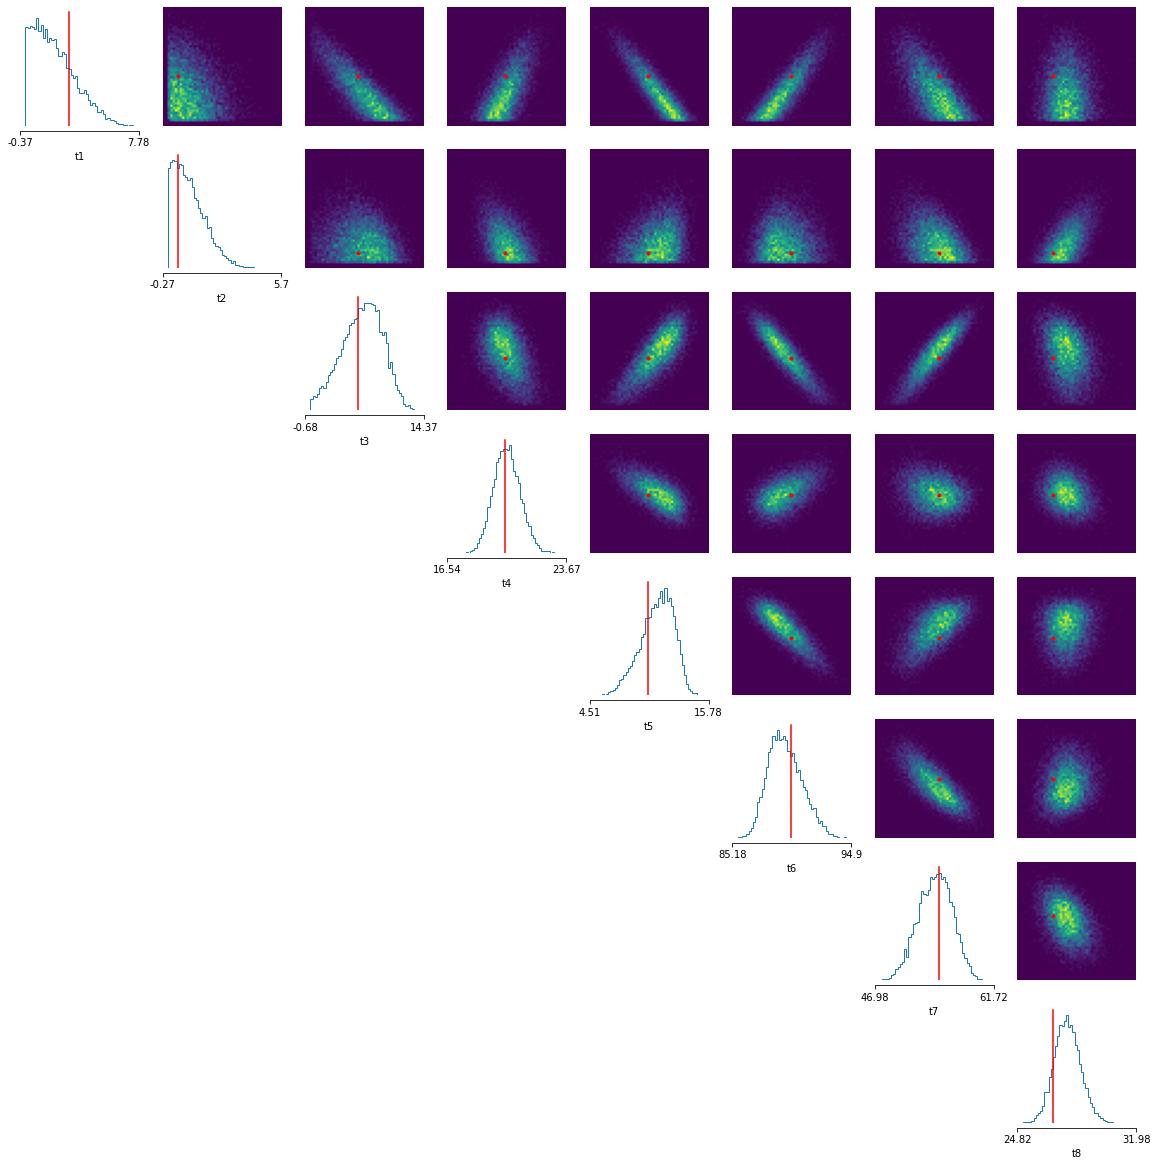

In [67]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]
true_thetas = torch.tensor([[3, 0.5, 6, 20, 10, 90, 55, 27]])
parameter_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=limits,
    figsize=(20, 20),
    points=true_thetas,
    points_offdiag={"markersize": 6},
    points_colors="r",
    tick_labels=np.round(limits,2),
    labels=parameter_names,
)

### Now we do the same, but with the incremental approach:

In [9]:
import datetime
range_list = [1,2,3,4,5,6,7,8]
num_simulations = 10

true_thetas = torch.tensor([[3, 0.5, 6, 20, 10, 90, 55, 27]])

prior_i = utils.torchutils.BoxUniform(low=prior_min[0:1], high = prior_max[0:1])
inf = SNPE_C(prior_i, density_estimator="mdn")
simulator_stats, prior_i = prepare_for_sbi(Gaussian, prior_i)

obs_real = Gaussian([true_thetas[0, 0]])





for index in range(len(range_list)-1):

    ## i defines number of parameters to be inferred, j indicates how many parameters 
    #to come in the next round
    i = range_list[index]
    j = range_list[index+1]

    print(i, j)


    start_time = datetime.datetime.now()

    theta, x =  simulate_for_sbi(
        simulator_stats,
        proposal=prior_i,
        num_simulations=num_simulations,
        num_workers=8,
        
    )



    inf = inf.append_simulations(theta, x)
    neural_dens = inf.train()

    posterior = inf.build_posterior(neural_dens)
    
    if i < 2:
        obs_real = Gaussian([true_thetas[0, 0:i]])
        
    else:
        obs_real = Gaussian(true_thetas[0, 0:i])



    proposal1 = posterior.set_default_x(obs_real)

    next_prior = utils.torchutils.BoxUniform(low=prior_min[i:j], high=prior_max[i:j])

    combined_prior = Combined(proposal1, next_prior, number_params_1=i)


    ## set inf for next round:
    inf = SNPE_C(combined_prior, density_estimator="mdn")


    ## set combined prior to be the new prior_i:
    prior_i = combined_prior
    
    finish_time = datetime.datetime.now()
    
    diff = finish_time - start_time
    
    print('took ', diff, ' for this step')
    

1 2


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Neural network successfully converged after 398 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 2])
took  0:00:02.521947  for this step
2 3


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 2])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 171 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 3])
took  0:00:00.954020  for this step
3 4


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 3])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 121 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 4])
took  0:00:00.709851  for this step
4 5


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 4])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 28 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 5])
took  0:00:00.357663  for this step
5 6


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 5])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 21 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 6])
took  0:00:00.257069  for this step
6 7


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 6])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 76 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 7])
took  0:00:00.625516  for this step
7 8


Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 7])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 83 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 8])
took  0:00:00.663906  for this step


In [10]:
prior_i.sample((100,)).shape

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

theta shape torch.Size([100, 8])


torch.Size([100, 8])

In [11]:
    
theta, x =  simulate_for_sbi(
    simulator_stats,
    proposal=prior_i,
    num_simulations=num_simulations,
    num_workers=8,

)

inf = inf.append_simulations(theta, x)
neural_dens = inf.train()

posterior = inf.build_posterior(neural_dens) 

Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

theta shape torch.Size([10, 8])


Running 10 simulations in 10 batches.:   0%|          | 0/10 [00:00<?, ?it/s]

Neural network successfully converged after 90 epochs.


In [13]:
obs_real = Gaussian(true_thetas[0, :])



posterior.set_default_x(obs_real)

In [15]:
num_samples = 10000


samples = posterior.sample((num_samples,), x=obs_real)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
samples.shape

torch.Size([10000, 8])

In [17]:
list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([   2.0314,   -8.4027, -104.8420,   -6.8462,  -42.2604, -155.7926,
        -106.3282,  -58.9968])
tensor([  3.6916,  12.1166, 133.5852,  65.4551, 185.4382, 297.8690, 170.9125,
        200.5642])
tensor([ 0.1660,  2.0519, 23.8427,  7.2301, 22.7699, 45.3662, 27.7241, 25.9561])


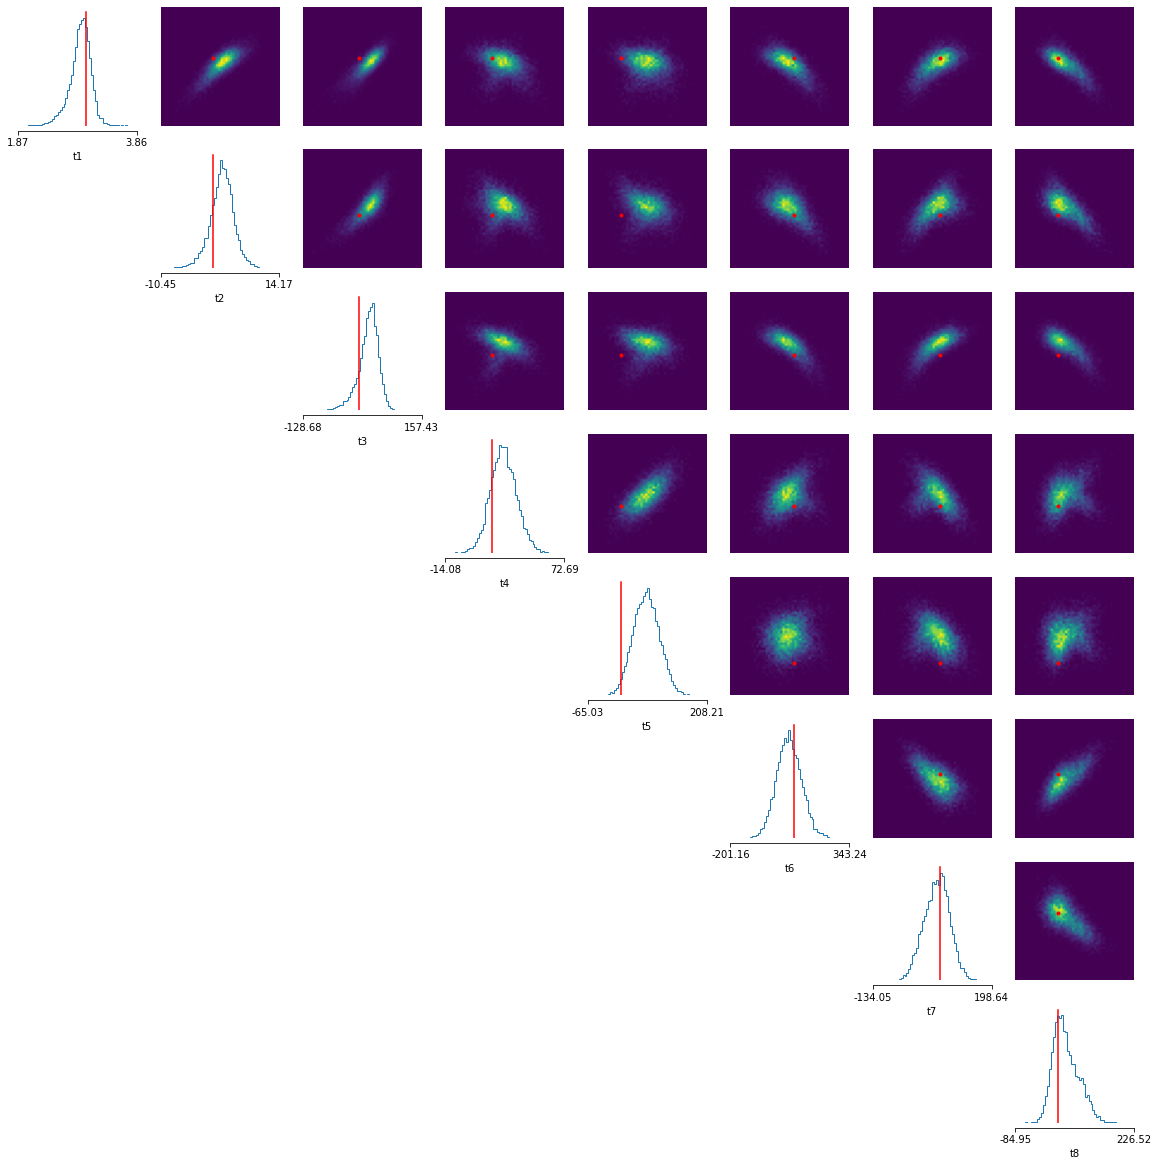

In [18]:
true_thetas = torch.tensor([[3, 0.5, 6, 20, 10, 90, 55, 27]])
parameter_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']




fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=np.round(limits, 2),
    figsize=(20, 20),
    points=true_thetas,
    points_offdiag={"markersize": 6},
    points_colors="r",
    tick_labels=np.round(limits,2),
    labels=parameter_names,
)

### Larger comparison with KL-divergence between analytic and inferred posterior

In [4]:
### analytic posterior:


analytic_list = []

for theta in true_thetas:
    analytic = torch.distributions.normal.Normal(theta, 0.1)
    analytic_list.append(analytic)




### Calculate posterior for different number of simulations: 1k,  3k, 5k, 10k

### starting with multi-round snpe

In [5]:
true_thetas = torch.Tensor([[3, 6, 20, 10, 90, 55, 27, 27, 4, 70, 5, 66, 99, 40, 45]])
parameter_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15']

prior_max = [100] * 15
prior_min = [0] * 15

import datetime

In [6]:
num_simulations_list = [150, 300]

prior = utils.torchutils.BoxUniform(low=prior_min, high = prior_max)
inf = SNPE_C(prior, density_estimator="mdn")
simulator_stats, prior = prepare_for_sbi(Gaussian, prior)

proposal = prior

posterior_snpe_list = []



for num_simulations in num_simulations_list:

    for i in range(3):
        
        start_time = datetime.datetime.now()

        theta, x = simulate_for_sbi(
            simulator_stats,
            proposal=proposal,
            num_simulations=num_simulations,
            num_workers=8,
        )

        inf = inf.append_simulations(theta, x)
        density_estimator = inf.train()

        posterior = inf.build_posterior(density_estimator)

        obs_real = Gaussian(true_thetas[0])


        proposal = posterior.set_default_x(obs_real)
        
        finish_time = datetime.datetime.now()

        diff_time_snpe = finish_time - start_time
        
        print('for round ',i, ' time is: ', diff_time_snpe)

    posterior_snpe = posterior
    
    posterior_snpe_list.append(posterior_snpe)
    
finish_time = datetime.datetime.now()

diff_time_snpe = finish_time - start_time

Running 150 simulations in 150 batches.:   0%|          | 0/150 [00:00<?, ?it/s]

Neural network successfully converged after 37 epochs.
for round  0  time is:  0:00:03.985066


Drawing 150 posterior samples:   0%|          | 0/150 [00:00<?, ?it/s]

Running 150 simulations in 150 batches.:   0%|          | 0/150 [00:00<?, ?it/s]

Neural network successfully converged after 27 epochs.
for round  1  time is:  0:00:04.525209


Drawing 150 posterior samples:   0%|          | 0/150 [00:00<?, ?it/s]

Running 150 simulations in 150 batches.:   0%|          | 0/150 [00:00<?, ?it/s]

Neural network successfully converged after 23 epochs.
for round  2  time is:  0:00:06.568491


Drawing 300 posterior samples:   0%|          | 0/300 [00:00<?, ?it/s]

Running 300 simulations in 300 batches.:   0%|          | 0/300 [00:00<?, ?it/s]

Neural network successfully converged after 214 epochs.
for round  0  time is:  0:01:30.092192


Drawing 300 posterior samples:   0%|          | 0/300 [00:00<?, ?it/s]

Running 300 simulations in 300 batches.:   0%|          | 0/300 [00:00<?, ?it/s]

Neural network successfully converged after 144 epochs.
for round  1  time is:  0:01:28.287194


Drawing 300 posterior samples:   0%|          | 0/300 [00:00<?, ?it/s]

Running 300 simulations in 300 batches.:   0%|          | 0/300 [00:00<?, ?it/s]

Neural network successfully converged after 69 epochs.
for round  2  time is:  0:00:56.018594


In [25]:
print(diff_time_snpe)

0:57:44.220780


### For incremental approach: 

In [9]:
range_list = [5,10, 15]

import datetime

num_simulations_list = [150, 300]


posterior_incremental_list = []


for num_simulations in num_simulations_list:
    
    prior_i = utils.torchutils.BoxUniform(low=prior_min[0:range_list[0]], high = prior_max[0:range_list[0]])
    
    inf = SNPE_C(prior_i, density_estimator="mdn")
    simulator_stats, prior_i = prepare_for_sbi(Gaussian, prior_i)
    
    start_num = 1

    for index in range(len(range_list)-1):
        
        start_time = datetime.datetime.now()

        ## i defines number of parameters to be inferred, j indicates how many parameters 
        #to come in the next round
        i = range_list[index]
        j = range_list[index+1]
        
        
        num_sim = int(num_simulations * ((start_num)/ 10) )   ### like this we use half of the simulations for the 
                                                             #first round, but double for the last
        
        start_num += 9
        print(num_sim)
        print(i, j)


        theta, x =  simulate_for_sbi(
            simulator_stats,
            proposal=prior_i,
            num_simulations=num_sim,
            num_workers=8,

        )

        inf = inf.append_simulations(theta, x, proposal=prior_i)
        neural_dens = inf.train()

        posterior = inf.build_posterior(neural_dens)

        if i < 2:
            obs_real = Gaussian([true_thetas[0, 0:i]])

        else:
            obs_real = Gaussian(true_thetas[0, 0:i])


        proposal1 = posterior.set_default_x(obs_real)

        next_prior = utils.torchutils.BoxUniform(low=prior_min[i:j], high=prior_max[i:j])

        combined_prior = Combined(proposal1, next_prior, number_params_1=i)


        ## set inf for next round:
        inf = SNPE_C(combined_prior, density_estimator="mdn")


        ## set combined prior to be the new prior_i:
        prior_i = combined_prior
        
        finish_time = datetime.datetime.now()
        
        diff_incremental = finish_time - start_time

        print('for round ',index, ' time is: ', diff_incremental)
        
    

    num_sim = int(num_simulations * ((start_num)/ 10) )
    print(num_sim)
    
    start_time = datetime.datetime.now()
        
    theta, x =  simulate_for_sbi(
        simulator_stats,
        proposal=prior_i,
        num_simulations=num_sim,
        num_workers=8,

    )

    inf = inf.append_simulations(theta, x)
    neural_dens = inf.train()

    posterior_incremental = inf.build_posterior(neural_dens) 
    
    posterior_incremental_list.append(posterior_incremental)
    
    finish_time = datetime.datetime.now()

    diff_incremental = finish_time - start_time

    print('for round ',2, ' time is: ',  diff_incremental)
    

finish_time = datetime.datetime.now()

diff_incremental = finish_time - start_time

print(diff_incremental)
    

15
5 10


Running 15 simulations in 15 batches.:   0%|          | 0/15 [00:00<?, ?it/s]

Neural network successfully converged after 78 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 10])
for round  0  time is:  0:00:00.563929
150
10 15


Drawing 150 posterior samples:   0%|          | 0/150 [00:00<?, ?it/s]

theta shape torch.Size([150, 10])


Running 150 simulations in 150 batches.:   0%|          | 0/150 [00:00<?, ?it/s]

Neural network successfully converged after 41 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 15])
for round  1  time is:  0:00:03.983147
285


Drawing 285 posterior samples:   0%|          | 0/285 [00:00<?, ?it/s]

theta shape torch.Size([285, 15])


Running 285 simulations in 285 batches.:   0%|          | 0/285 [00:00<?, ?it/s]

Neural network successfully converged after 32 epochs.
for round  2  time is:  0:00:05.600831
30
5 10


Running 30 simulations in 30 batches.:   0%|          | 0/30 [00:00<?, ?it/s]

Neural network successfully converged after 86 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 10])
for round  0  time is:  0:00:00.774757
300
10 15


Drawing 300 posterior samples:   0%|          | 0/300 [00:00<?, ?it/s]

theta shape torch.Size([300, 10])


Running 300 simulations in 300 batches.:   0%|          | 0/300 [00:00<?, ?it/s]

Neural network successfully converged after 67 epochs.


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

theta shape torch.Size([1, 15])
for round  1  time is:  0:00:14.440526
570


Drawing 570 posterior samples:   0%|          | 0/570 [00:00<?, ?it/s]

theta shape torch.Size([570, 15])


Running 570 simulations in 570 batches.:   0%|          | 0/570 [00:00<?, ?it/s]

Neural network successfully converged after 46 epochs.
for round  2  time is:  0:00:16.429675
0:00:16.430017


In [24]:
print(diff_incremental)

0:29:22.670035


In [8]:
import torch.nn.functional as F


#out = F.kl_div(analytic_sample, posterior_sample)

In [9]:
obs_real = Gaussian(true_thetas[0, 0:])

def calc_KL_highd(posterior):
    
    sample = posterior.sample((1000,))
    
    analytic = torch.distributions.normal.Normal(true_thetas, 0.1)
    
    analytic_sample = analytic.sample((1000,))
    
    analytic_sample = analytic_sample.squeeze(1)
    
    out = F.kl_div(analytic_sample, sample)
    
    return out



def calc_KL_1d(posterior):
    
    sample = posterior.sample((1000,))
    
    analytic = torch.distributions.normal.Normal(true_thetas, 0.1)
    
    analytic_sample = analytic.sample((1000,))
    
    analytic_sample = analytic_sample.squeeze(1)
    
    print(sample.shape)
    print(analytic_sample.shape)
    
    sum_KL = 0
    out_list = []
    for i in range(len(true_thetas[0])):
        
        out = F.kl_div(analytic_sample[:,i], sample[:,i])
        out_list.append(out)
        
        sum_KL += out
    
    return out_list, sum_KL

In [ ]:
from scipy.spatial import cKDTree as KDTree


analytic = torch.distributions.normal.Normal(true_thetas, 0.1)
sample_y = analytic.sample((1000,))
sample_y = sample_y.squeeze(1)

In [ ]:
def KLdivergence(x, y= sample_y):
    """Compute the Kullback-Leibler divergence between two multivariate samples.
    Parameters
    ----------
    x : 2D array (n,d)
    Samples from distribution P, which typically represents the true
    distribution.
    y : 2D array (m,d)
    Samples from distribution Q, which typically represents the approximate
    distribution.
    Returns
    -------
    out : float
    The estimated Kullback-Leibler divergence D(P||Q).
    References
    ----------
    Pérez-Cruz, F. Kullback-Leibler divergence estimation of
    continuous distributions IEEE International Symposium on Information
    Theory, 2008.
    """

    # Check the dimensions are consistent
    x = x.sample((1000,))
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)

    n,d = x.shape
    m,dy = y.shape
    
    print(n, d, m, dy)

    assert(d == dy)


    # Build a KD tree representation of the samples and find the nearest neighbour
    # of each point in x.
    xtree = KDTree(x)
    ytree = KDTree(y)

    # Get the first two nearest neighbours for x, since the closest one is the
    # sample itself.
    r = xtree.query(x, k=2, eps=.01, p=2)[0][:,1]
    s = ytree.query(x, k=1, eps=.01, p=2)[0]

    # There is a mistake in the paper. In Eq. 14, the right side misses a negative sign
    # on the first term of the right hand side.
    return -np.log(r/s).sum() * d / n + np.log(m / (n - 1.))

In [ ]:
def KL_div2(X, Y): 
    n, d = X.shape
    m, d = Y.shape
    _, minXX = nearest_neighbours(X, X)
    _, minXY = nearest_neighbours(X, Y)

    kl1 = d / n * torch.sum(torch.log(minXY / minXX), dim=0)
    kl2 = torch.log(torch.tensor(m) / (torch.tensor(n) - 1))
    kl = kl1 + kl2
    return float(kl)

In [ ]:
analytic = torch.distributions.normal.Normal(true_thetas, 0.1)

analytic.stddev

In [7]:
def KL_Gauss(X, Y):
    
    sample_x = X.sample((10000,))
    mu_x = torch.mean(sample_x, dim=0)
    var_x = torch.std(sample_x, dim=0)

    var_y = Y.stddev

    mu_y = Y.mean
    
    
    return torch.mean(np.log(var_y/var_x) + (var_x**2 + (mu_x - mu_y)**2)/(2*var_y**2) -(1/2))


def calc_KL_1d(X, Y):
    
    sample_x = X.sample((10000,))
    mu_x = torch.mean(sample_x, dim=0)
    var_x = torch.std(sample_x, dim=0)
    
    print(var_x)
    print(mu_x)

    var_y = Y.stddev

    mu_y = Y.mean
    
    print(np.log(var_y/var_x) + (var_x**2 + (mu_x - mu_y)**2)/(2*var_y**2) -(1/2))
    
    return np.log(var_y/var_x) + (var_x**2 + (mu_x - mu_y)**2)/(2*var_y**2) -(1/2)


# calculate the jensen-shanon divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [14]:
KL_snpe = []
KL_snpe_1d = []
KL_snpe_sum = []

analytic = torch.distributions.normal.Normal(true_thetas, 0.1)


for posterior_snpe in posterior_snpe_list:
    
    
    #KL = KLdivergence(posterior_snpe, sample_y)
    KL = KL_Gauss(posterior_snpe, analytic)
    
    
    KL_1d = calc_KL_1d(posterior_snpe, analytic)
    
    KL_snpe_1d.append(KL_1d)
    
    #KL_snpe_sum.append(sum_KL)
    
    KL_snpe.append(KL)


    
    

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([21.9214, 21.9439, 22.0306, 21.2912, 21.2333, 21.5604, 21.2295, 21.4316,
        22.3963, 22.1478, 22.4370, 22.2202, 21.4897, 21.9543, 21.8065])
tensor([51.0632, 49.3315, 49.9063, 50.7778, 52.5805, 52.7766, 46.7131, 53.3335,
        47.1799, 49.9603, 52.1633, 51.8227, 52.0569, 45.2340, 49.5751])
tensor([[139525.1250, 117951.6797,  68980.7188, 105801.3984,  92547.5469,
          23483.9277,  41959.2188,  57632.3047, 118298.9141,  44599.8672,
         136384.1875,  34730.7422, 133267.0938,  25463.2871,  24816.8398]])


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([12.6950,  4.6975,  5.5726,  3.2340,  8.8872, 10.9892,  5.5465,  2.7434,
        11.4275,  9.9402,  4.4131,  2.7104,  9.3778,  4.8973,  6.0885])
tensor([42.2688, 13.1427, 21.2916, 12.9216, 81.7255, 76.6631, 18.6711, 26.8814,
        33.1970, 66.5767,  6.8155, 56.8037, 79.3365, 38.0151, 24.9546])
tensor([[85154.7656,  3649.8767,  1631.5638,   945.7526,  7367.5425, 29497.4805,
          5002.2041,   373.2019, 49147.5000,  5521.1963,  1134.3004,  4592.0713,
         23724.6348,  1391.8082, 21939.9023]])


In [10]:
obs_real = Gaussian(true_thetas[0, 0:])

KL_incremental = []

KL_incremental_1d = []

KL_incremental_sum = []

analytic = torch.distributions.normal.Normal(true_thetas, 0.1)

for posterior_incremental in posterior_incremental_list:
    
    posterior_incremental.set_default_x(obs_real)
    
    #KL = KLdivergence(posterior_incremental, sample_y)
    
    KL = KL_Gauss(posterior_incremental, analytic)
    
    KL_1d = calc_KL_1d(posterior_incremental, analytic)
    
    KL_incremental_1d.append(KL_1d)
    
    #KL_incremental_sum.append(sum_KL)
    
    KL_incremental.append(KL)
    
    

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([29.3066, 28.0897, 15.6917, 17.7834, 24.9532, 28.2186, 29.8556, 26.0665,
        28.2430, 29.0758, 29.1636, 28.1991, 29.7383, 27.9277, 28.8940])
tensor([50.1682, 47.9084, 28.4500, 44.3216, 57.7679, 53.1333, 52.3913, 42.8732,
        43.0471, 50.1012, 48.7023, 48.2449, 48.3753, 53.3220, 45.4279])
tensor([[154179.5156, 127260.8203,  15876.0488,  74705.5234,  83072.5000,
          39982.4492,  76797.4453,  46565.0234, 116110.8281,  62062.0430,
         138014.2812,  55515.5703, 172355.0312,  47865.5117,  41746.0586]])


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([ 6.7041,  4.2700,  5.1995,  9.4788,  4.9099,  6.6406, 11.6443, 10.2176,
        14.2839, 10.4561, 20.4048, 13.7571, 21.5442, 24.6156, 20.2754])
tensor([26.3383, 13.9708, 43.6597, 26.6530, 83.1612, 36.8027, 62.8662, 54.5384,
        -1.2716, 50.7844, 40.0692, 67.3038, 96.3631, 68.6317, 46.1084])
tensor([[29476.2500,  4084.0376, 29336.3770, 18353.4141,  3539.4338, 18757.2148,
         71093.5312, 43132.8984, 11585.5332, 23923.2852, 82304.3984,  9542.4092,
         23549.3496, 71279.2188, 20610.1602]])


In [13]:
KL_incremental_1d[0][0]

tensor([ 91901.9375,  89907.0391,  42287.3711,  57999.3359,  45915.2109,
         58444.0469,  63669.2461,  43676.8398, 120016.6797,  42918.6992,
        146235.2812,  57116.7227, 118525.9297,  53329.0039,  40369.4219])

In [18]:
obs_real = Gaussian(true_thetas[0, 0:])

In [19]:
for i, posterior_incremental in enumerate(posterior_incremental_list):
    
    posterior_incremental.set_default_x(obs_real)
    
    torch.save(posterior_incremental, 'posterior_incremental{}.pt'.format(i))
    
for i, posterior_snpe in enumerate(posterior_snpe_list):
    

    torch.save(posterior_snpe, 'posterior_snpe{}.pt'.format(i))

In [5]:
##load posteriors if already saved:

posterior_snpe0 = torch.load('posterior_snpe0.pt')
posterior_snpe1 = torch.load('posterior_snpe1.pt')
posterior_snpe2 = torch.load('posterior_snpe2.pt')
#posterior_snpe3 = torch.load('posterior_snpe3.pt')


posterior_incremental_0 = torch.load('posterior_incremental0.pt')
posterior_incremental_1 = torch.load('posterior_incremental1.pt')
posterior_incremental_2 = torch.load('posterior_incremental2.pt')
#posterior_incremental_3 = torch.load('posterior_incremental3.pt')

posterior_snpe_list = [posterior_snpe0, posterior_snpe1, posterior_snpe2]
posterior_incremental_list = [posterior_incremental_0, posterior_incremental_1, posterior_incremental_2]


### Compare KL-divergence of snpe approach with incremental approach in a plot:

#### x = number of simulations per round/step

Text(0.5, 1.0, 'Three steps, 15dim')

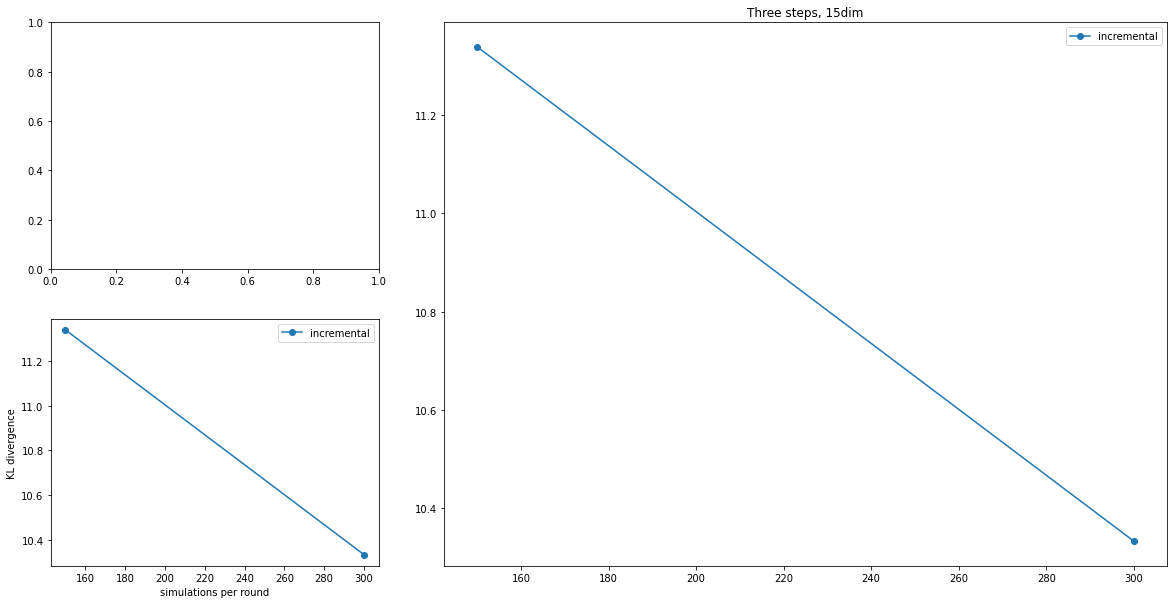

In [12]:
figure_mosaic = """
ACC
BCC
"""

fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(20, 10))

    
num_simulations_list = [150, 300]


axes['B'].plot(num_simulations_list, np.log(KL_incremental), '-o',label='incremental')
#axes['A'].plot(num_simulations_list, np.log(KL_snpe), '-o', label='snpe', color='orange')

axes['C'].plot(num_simulations_list, np.log(KL_incremental), '-o', label='incremental')
#axes['C'].plot(num_simulations_list, np.log(KL_snpe), '-o', label='snpe', color='orange')

#plt.title('KL loss')
#axes['A'].legend()
axes['B'].legend()
axes['C'].legend()

plt.xlabel('simulations per round')
plt.ylabel('KL divergence')

axes['C'].set_title('Three steps, 15dim')


#axes['B'].set_xticklabels(['0k','2k', '4k', '6k', '8k', '10k'])
#axes['A'].set_xticklabels(['0k','2k', '4k', '6k', '8k', '10k'])
#axes['C'].set_xticklabels(['0k','2k', '4k', '6k', '8k', '10k'])
#plt.xticks(['1k', '3k', '5k', '10k'])

In [167]:
[torch.mean(i[0][0:5], dim=0) for i in KL_incremental_1d]

[tensor(92980.4062),
 tensor(56118.5234),
 tensor(288.7476),
 tensor(517.1208),
 tensor(339.6132),
 tensor(59.8931),
 tensor(2.3179)]

Text(0, 0.5, 'KL divergence')

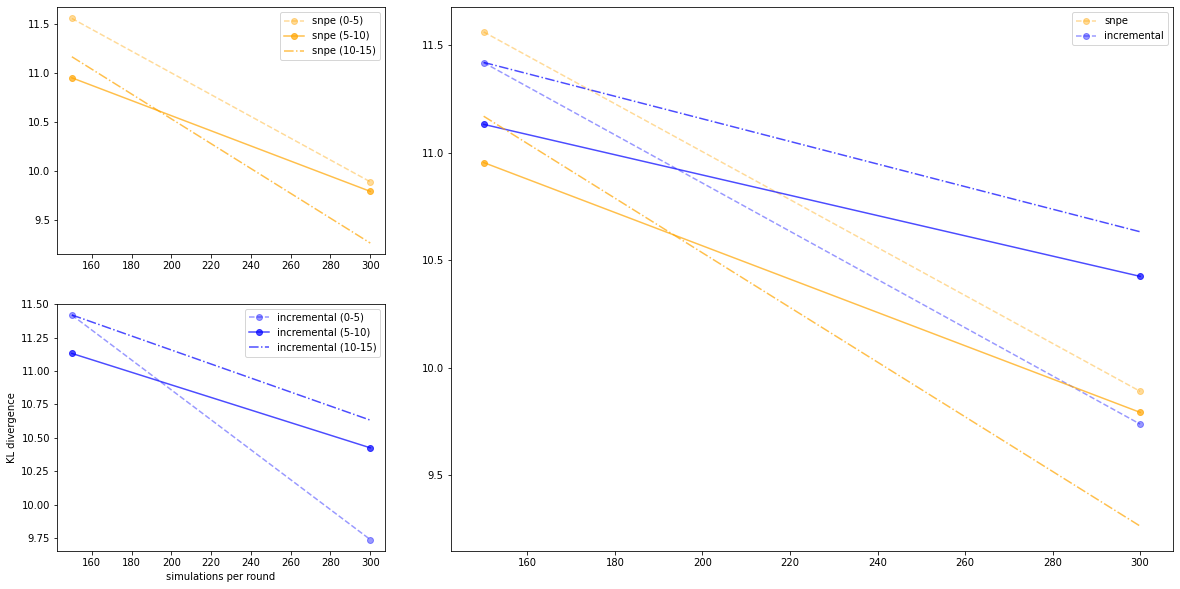

In [15]:
import matplotlib as mpl

figure_mosaic = """
ACC
BCC
"""

fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(20, 10))

    
num_simulations_list = [150, 300]


axes['A'].plot(num_simulations_list, np.log([torch.mean(i[0][0:5]) for i in KL_snpe_1d]), '--o', color='orange', alpha=0.4)
axes['B'].plot(num_simulations_list, np.log([torch.mean(i[0][0:5]) for i in KL_incremental_1d]), '--o', color='blue', alpha=0.4)
    
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][0:5]) for i in KL_snpe_1d]), '--o', color='orange', alpha=0.4)
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][0:5]) for i in KL_incremental_1d]), '--o', color='blue', alpha=0.4)


axes['A'].plot(num_simulations_list, np.log([torch.mean(i[0][5:10]) for i in KL_snpe_1d]), '-o', color='orange', alpha=0.7)
axes['B'].plot(num_simulations_list, np.log([torch.mean(i[0][5:10]) for i in KL_incremental_1d]), '-o', color='blue', alpha=0.7)
    
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][5:10]) for i in KL_snpe_1d]), '-o', color='orange', alpha=0.7)
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][5:10]) for i in KL_incremental_1d]), '-o', color='blue', alpha=0.7)


axes['A'].plot(num_simulations_list, np.log([torch.mean(i[0][10:15]) for i in KL_snpe_1d]), '-.', color='orange', alpha=0.7)
axes['B'].plot(num_simulations_list, np.log([torch.mean(i[0][10:15]) for i in KL_incremental_1d]), '-.', color='blue', alpha=0.7)
    
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][10:15]) for i in KL_snpe_1d]), '-.', color='orange', alpha=0.7)
axes['C'].plot(num_simulations_list, np.log([torch.mean(i[0][10:15]) for i in KL_incremental_1d]), '-.', color='blue', alpha=0.7)

    
axes['A'].legend(['snpe (0-5)', 'snpe (5-10)', 'snpe (10-15)'])
axes['B'].legend(['incremental (0-5)','incremental (5-10)','incremental (10-15)'])
axes['C'].legend(['snpe', 'incremental'])

plt.xlabel('simulations per round')
plt.ylabel('KL divergence')

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

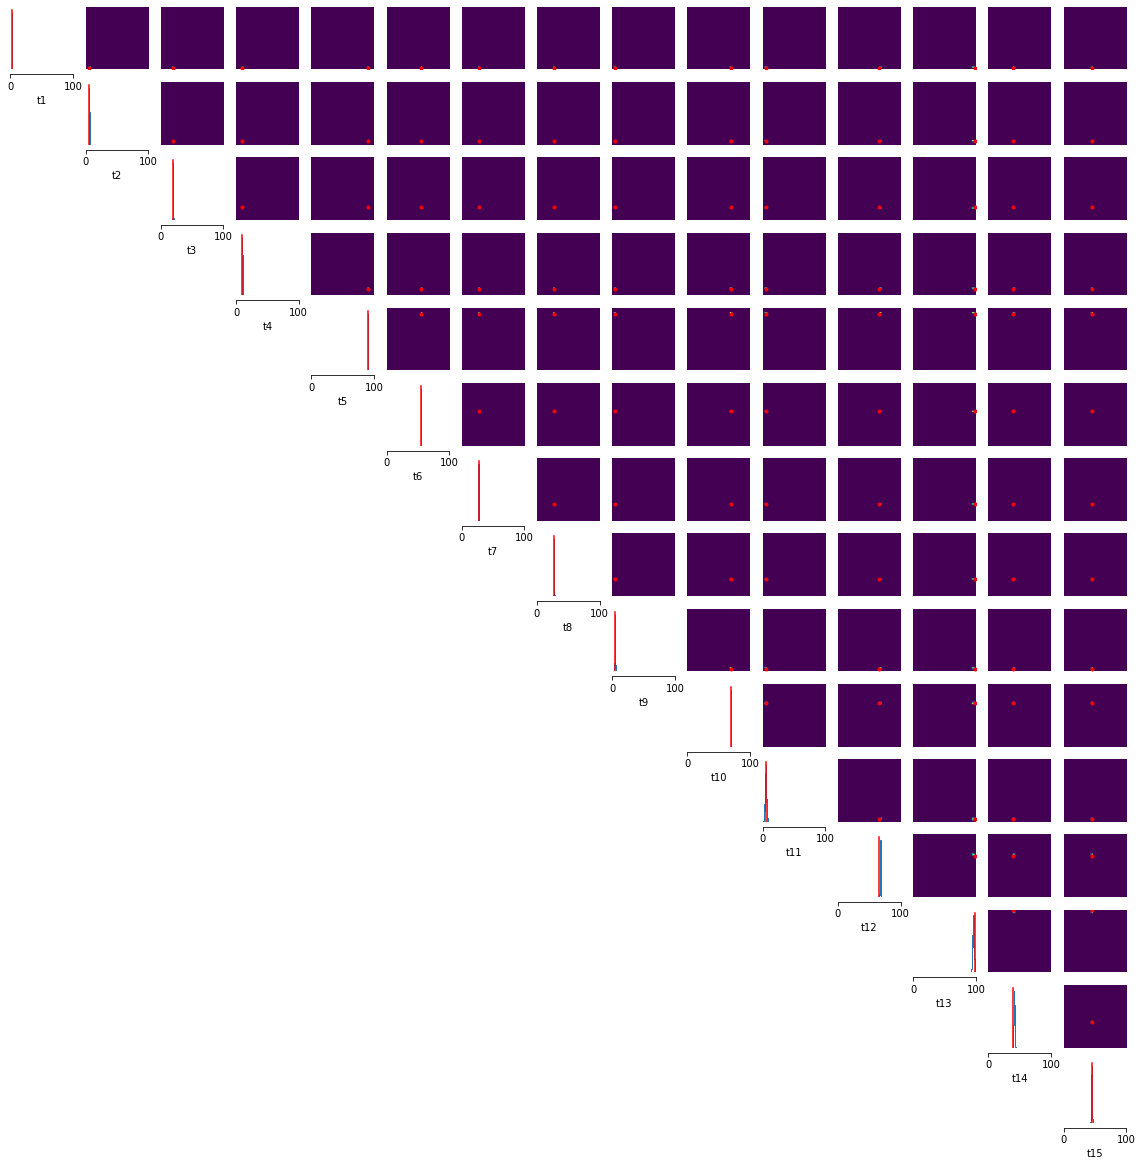

In [18]:
true_thetas = torch.Tensor([[3, 6, 20, 10, 90, 55, 27, 27, 4, 70, 5, 66, 99, 40, 45]])
parameter_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15']

posterior_incremental_list[2].set_default_x(obs_real)
samples = posterior_incremental_list[2].sample((1000,))



limits = [list(tup) for tup in zip(prior_min, prior_max)]



fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=np.round(limits, 2),
    figsize=(20, 20),
    points=true_thetas,
    points_offdiag={"markersize": 6},
    points_colors="r",
    tick_labels=np.round(limits,2),
    labels=parameter_names,
)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

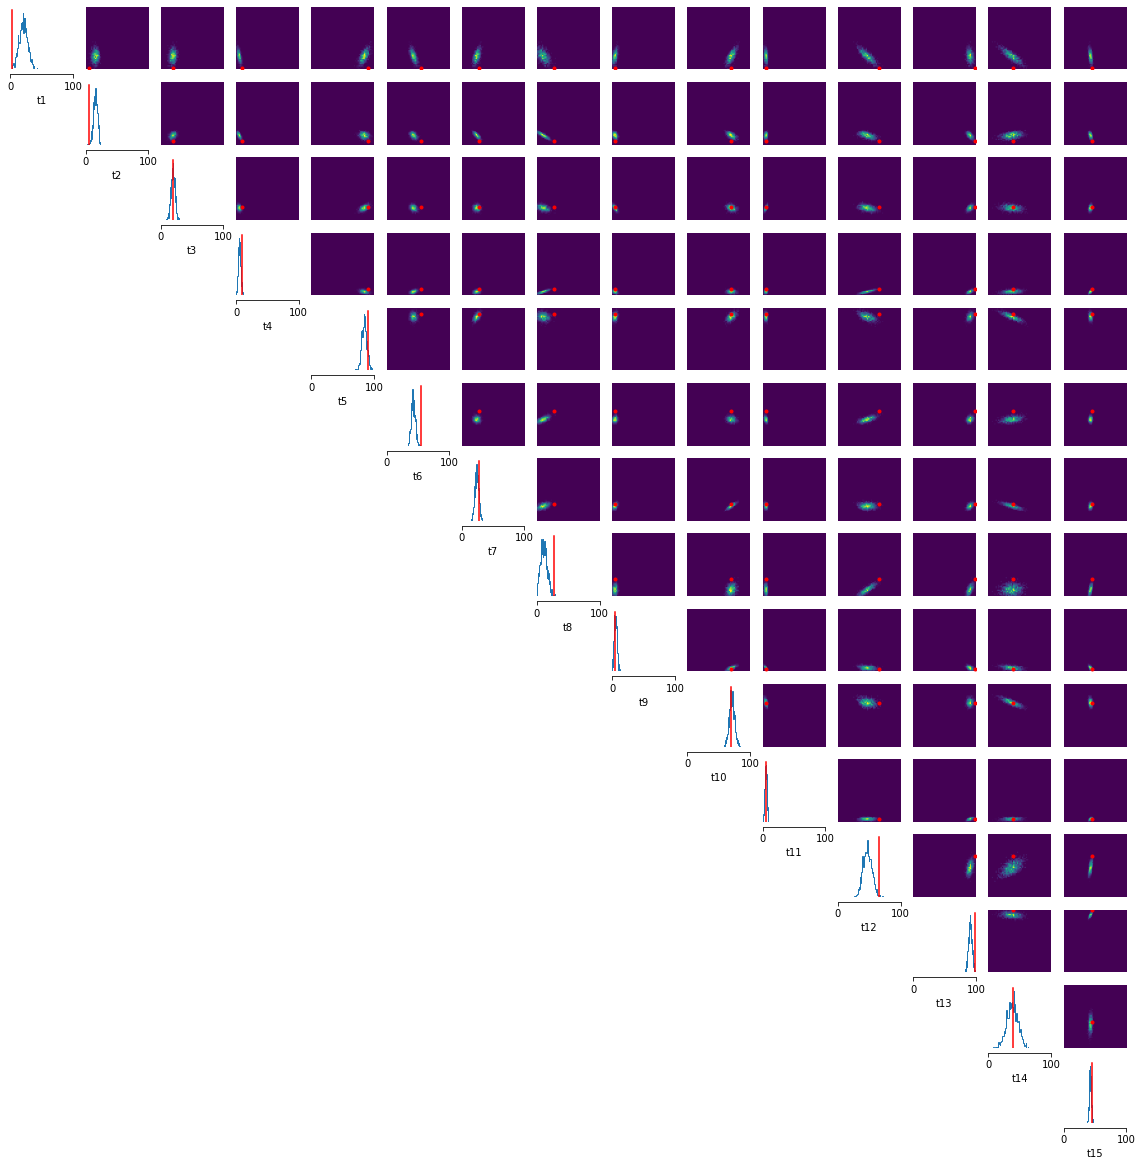

In [19]:
true_thetas = torch.Tensor([[3, 6, 20, 10, 90, 55, 27, 27, 4, 70, 5, 66, 99, 40, 45]])
parameter_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15']


samples = posterior_snpe_list[2].sample((1000,))



fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=np.round(limits, 2),
    figsize=(20, 20),
    points=true_thetas,
    points_offdiag={"markersize": 6},
    points_colors="r",
    tick_labels=np.round(limits,2),
    labels=parameter_names,
)